In [4]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
import fiona 

import cartopy.crs as ccrs
from lib.funcs import *
from lib.mapping import *
import contextily as ctx
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [ ]:
def crop(ax, factor_top, factor_right, factor_bottom, factor_left):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    new_lim_left = (xlim[0] + xlim[1]) / 2 + np.array((-0.5, 0.5)) * (
        xlim[1] - xlim[0]
    ) * (factor_left)
    new_lim_right = (xlim[0] + xlim[1]) / 2 + np.array((-0.5, 0.5)) * (
        xlim[1] - xlim[0]
    ) * (factor_right)
    new_lim_bottom = (ylim[0] + ylim[1]) / 2 + np.array((-0.5, 0.5)) * (
        ylim[1] - ylim[0]
    ) * (factor_bottom)
    new_lim_top = (ylim[0] + ylim[1]) / 2 + np.array((-0.5, 0.5)) * (
        ylim[1] - ylim[0]
    ) * (factor_top)

    new_lim_left = tuple(new_lim_left)
    new_lim_right = tuple(new_lim_right)
    new_lim_top = tuple(new_lim_top)
    new_lim_bottom = tuple(new_lim_bottom)

    new_ylim = (new_lim_bottom[0], new_lim_top[1])
    new_xlim = (new_lim_left[0], new_lim_right[1])

    ax.set_xlim(new_xlim)
    ax.set_ylim(new_ylim)

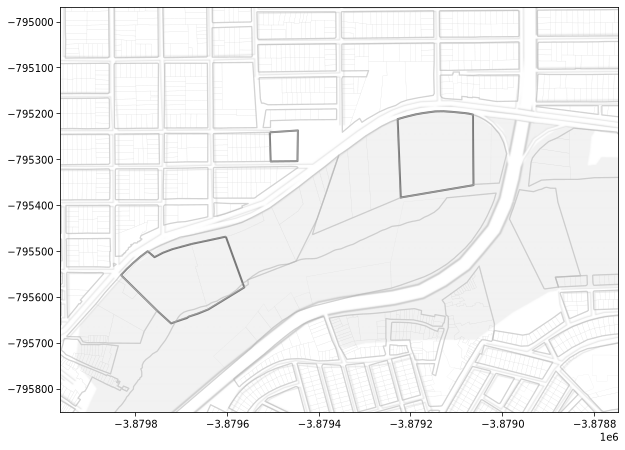

In [34]:
lotes_empreendimento = gpd.read_file('./data/BASES/empreendimento.shp').to_crs('epsg:3857')
quadras = gpd.read_file('./data/BASES/quadras/quadras.shp').to_crs('epsg:3857')
lotes_geral = gpd.read_file('./data/BASES/lotes_geral/Lotes.kml').to_crs('epsg:3857')

                
                      
fig, ax = plt.subplots(figsize = (10,10)) 
ax = lotes_empreendimento.plot(alpha=0.5, edgecolor='k', facecolor='none', ax=ax, linewidth=2)
quadras.plot(figsize=(10, 10), alpha=0.5, edgecolor='#aaaaaa', facecolor='none', linewidth=1.3, ax=ax)
lotes_geral.plot(figsize=(10, 10), alpha=0.5, edgecolor='#cccccc', facecolor='none', ax=ax, linewidth=0.2)

factor_top = 0.4
factor_bottom = 0.05
factor_right = 0.09
factor_left = 0.5

crop(ax, factor_top, factor_right, factor_bottom, factor_left)

ctx.add_basemap(
        ax,
        source=ctx.providers.Stamen.TonerBackground,
        zoom=18,
        alpha=0.2,
        attribution="",
        zorder=0,
)